In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test-data', 'speaker-id', 'filestxt']


In [2]:
import torch
import numpy as np
import librosa
import pickle as pickle
from scipy.io.wavfile import read
import os
import random
import matplotlib.pyplot as plt
import librosa.display

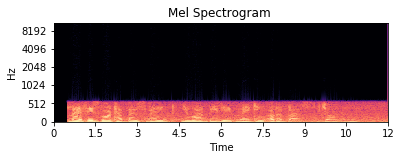

In [3]:
source = '../input/speaker-id/'

signal, rate = librosa.load(source + 'Rohit_1.wav', sr=44100)
spec = librosa.feature.melspectrogram(signal, sr=44100, hop_length=441)
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(np.abs(librosa.stft(signal)), ref=np.max), y_axis='mel', x_axis='time')
plt.title('Mel Spectrogram ')
plt.show()

In [4]:
train_file = '../input/filestxt/files.txt'
file_paths = open(train_file,'r')
l = []

for path in file_paths:
    path = path.strip()
    print(path)
    
    signal, rate = librosa.load(source + path, sr=44100)
    
    x = librosa.feature.mfcc(signal, sr=44100, n_mfcc=20)
    l.append(x)
    
#l

Rohit_1.wav
Rohit_2.wav
Rohit_3.wav
Rohit_4.wav
Rohit_5.wav
Rohit_6.wav
Rohit_7.wav
Rohit_8.wav
Rohit_9.wav
Rohit_10.wav
Varun_1.wav
Varun_2.wav
Varun_3.wav
Varun_4.wav
Varun_5.wav
Varun_6.wav
Varun_7.wav
Varun_8.wav
Varun_9.wav
Varun_10.wav


In [5]:
for i in range(len(l)):
    print(l[i].shape)

(20, 517)
(20, 448)
(20, 517)
(20, 690)
(20, 690)
(20, 483)
(20, 448)
(20, 414)
(20, 517)
(20, 483)
(20, 662)
(20, 552)
(20, 552)
(20, 552)
(20, 552)
(20, 331)
(20, 442)
(20, 442)
(20, 221)
(20, 442)


In [6]:
import tensorflow as tf
b = []
for i in range(len(l)):
    
    x = l[i]
    
    y = x[:, :200]
    
    l[i] = y
    
    l[i] /= 1000

    b.append(l[i])
    
for i in range(len(l)):
    
    l[i].reshape([20 ,20 ,10, 1])
    

    print(l[i].shape)

(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)
(20, 200)


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

nClasses = 2
input_shape = (20, 200, 1)

def Model():
    
    model = Sequential()
    
    model.add(Conv2D(10, (3,3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(10, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Flatten())
    model.add(Dense(nClasses, activation='softmax'))
  
    return model

Using TensorFlow backend.


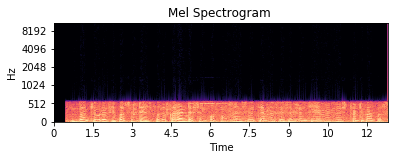

In [8]:
source = '../input/test-data/'

signal, rate = librosa.load(source + 'Varun_test.wav', sr=44100)
spec = librosa.feature.melspectrogram(signal, sr=44100, hop_length=441)
plt.subplot(2,1,1)
librosa.display.specshow(librosa.power_to_db(np.abs(librosa.stft(signal)), ref=np.max), y_axis='mel', x_axis='time')
plt.title('Mel Spectrogram ')
plt.show()

In [9]:
x = librosa.feature.mfcc(signal, sr=44100, n_mfcc=20)
t = []
y = x[:, :200]
t.append(y)

In [10]:
import matplotlib.pyplot as plt

from sklearn.mixture.gaussian_mixture import GaussianMixture 

gmm = GaussianMixture(n_components = 2, max_iter = 200, covariance_type='diag',n_init = 3)

s = np.vstack((b[0],b[1],b[2],b[3],b[4],b[5],b[6],b[7],b[8],b[9],b[10],
          b[11],b[12],b[13],b[14],b[15],b[16],b[17],b[18],b[19]))
s.shape

(400, 200)

In [11]:
gmm.fit(s)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=200,
                means_init=None, n_components=2, n_init=3, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
v1 = s[:200, :]
v1 = list(v1)
v2 = s[200:, :]
v2 = list(v2)

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(s)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = kmeans.predict(s)
centroids = kmeans.cluster_centers_

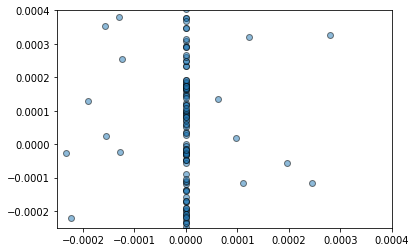

In [15]:
fig = plt.figure()

plt.scatter(v1, v2, alpha=0.5, edgecolor='k')
plt.xlim(-0.00025, 0.0004)
plt.ylim(-0.00025, 0.0004)
plt.show()

In [16]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(v1)



PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 1

knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(v1, v2) 

ValueError: Unknown label type: 'continuous-multioutput'